# svm

- 서포트 백터머신
- 데이터를 2개의 클래스로 분리하는 초평면을 발견하는 것

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from pandas_datareader import data
from sklearn.model_selection import train_test_split

In [5]:
def load_financial_data(start_date, end_date, output_file):
    df = data.DataReader('GOOG', 'yahoo', start_date, end_date)
    return df

In [6]:
goog_data=load_financial_data(start_date='2001-01-01', end_date='2021-01-01', output_file='goog_data_large.pkl')

In [7]:
def create_trading_condition(df):
    df['Open-Close']=df.Open-df.Close
    df['High-Low']=df.High-df.Low
    df=df.dropna()
    X=df[['Open-Close','High-Low']]
    Y=np.where(df['Close'].shift(-1)>df['Close'],1,-1)
    return (X,Y)

In [8]:
def create_train_split_group(X,Y,split_ratio=0.8):
    return train_test_split(X,Y,shuffle=False,train_size=split_ratio)

In [9]:
X,Y=create_trading_condition(goog_data)

In [10]:
X_train,X_test,Y_train,Y_test=\
    create_train_split_group(X,Y,split_ratio=0.8)

In [11]:
# Fit the model
svc=SVC()
svc.fit(X_train, Y_train)

SVC()

In [12]:
goog_data['Predicted_Signal']=svc.predict(X)
goog_data['GOOG_Returns']=np.log(goog_data['Close']/
                                 goog_data['Close'].shift(1))

In [14]:
def calculate_return(df,split_value,symbol):
    cum_goog_return= df[split_value:]['%s_Returns' % symbol].cumsum() * 100
    df['Strategy_Returns']= df['%s_Returns' % symbol] * df['Predicted_Signal'].shift(1)
    return cum_goog_return

In [15]:
def calculate_strategy_return(df,split_value):
    cum_strategy_return = df[split_value:]['Strategy_Returns'].cumsum() * 100
    return cum_strategy_return

In [16]:
cum_goog_return=calculate_return(goog_data,split_value=len(X_train),symbol='GOOG')
cum_strategy_return= calculate_strategy_return(goog_data,split_value=len(X_train))

In [17]:
def plot_chart(cum_symbol_return, cum_strategy_return, symbol):
    plt.figure(figsize=(10,5))
    plt.plot(cum_symbol_return, label='%s Returns' % symbol)
    plt.plot(cum_strategy_return,label='Strategy Returns')
    plt.legend()
    plt.show()

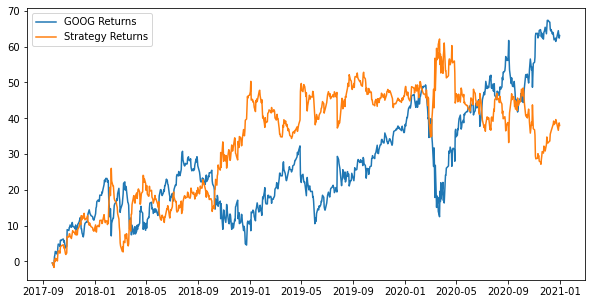

In [18]:
plot_chart(cum_goog_return, cum_strategy_return, symbol='GOOG')